# Best Neighborhoods in Pittsburgh

### A presentation by P.I.P

Today were rating the best neighborhood in Pittsburgh, but this begs the question:


#### What makes a neighborhood the best?

##### The more aesthetically pleasing a neighborhood is, the better it is.

## The Metrics
### Trees, Traffic, and Street Art

The more trees and art an area has the prettier it is. The more traffic there is, the uglier it gets.

### Metric 1: Save the Trees

In [20]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

First, lets read the dataset into the notebook.

In [21]:
trees = pd.read_csv("trees.csv", low_memory = False)
# setting the id to 1, so that it can be totaled further down.
trees.iloc[:,0] =1

Next, lets find the total number of trees in each neighborhood.

In [22]:
values = trees.groupby('neighborhood').sum()['id']
values = values.sort_values(ascending=False)
values

neighborhood
Squirrel Hill South    5073
Highland Park          2941
Squirrel Hill North    2083
South Side Flats       1693
Shadyside              1558
                       ... 
Arlington Heights         5
Esplen                    3
Glen Hazel                2
South Shore               2
Hays                      1
Name: id, Length: 90, dtype: int64

Now, lets plot the top 5 neighborhoods on a bar graph.

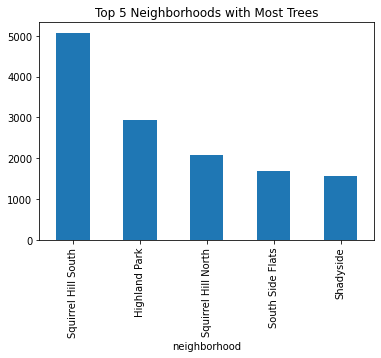

In [23]:
valueshigh = values.head(5)
valueshigh.plot.bar(x = values[0], y = values[1], title = "Top 5 Neighborhoods with Most Trees")

This is boring though, so lets plot the data on a map to see it in another form.

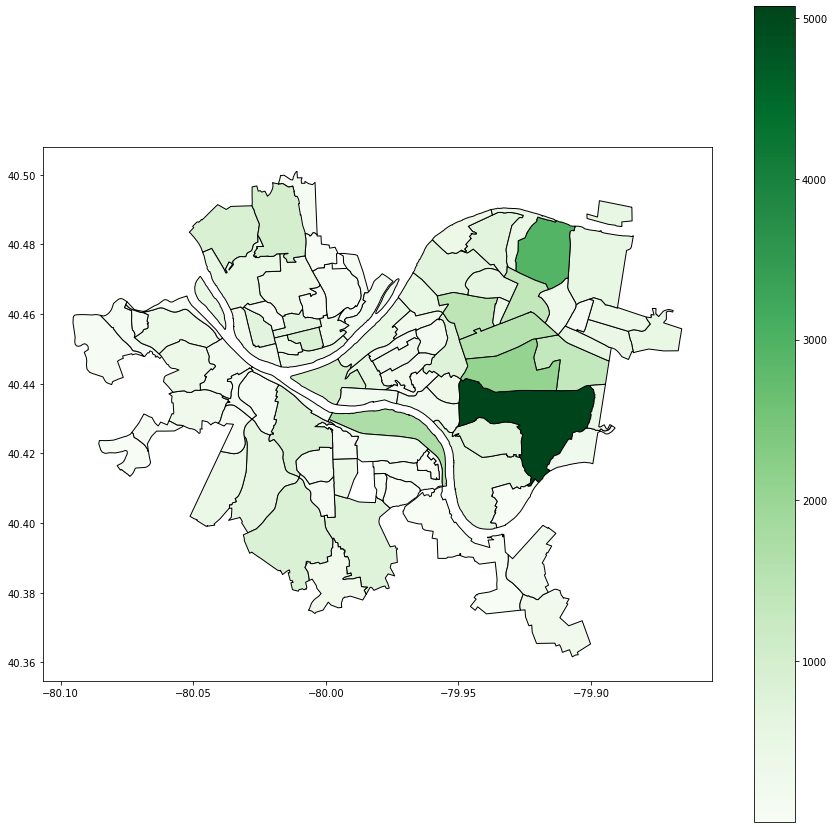

In [24]:
import geopandas 
import shapely
from shapely.geometry import Point
from geopandas import GeoDataFrame
#create map of pittsburgh neighborhoods
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
#feed tree data into map
mapn = neighborhoods.merge(values, how = 'left',left_on = 'hood', right_on = 'neighborhood')
mapn.plot(column = 'id',cmap = 'Greens', edgecolor ='black',figsize = (15,15), legend = True)

This is good, but what if we could see where every tree in Pittsburgh actually is.

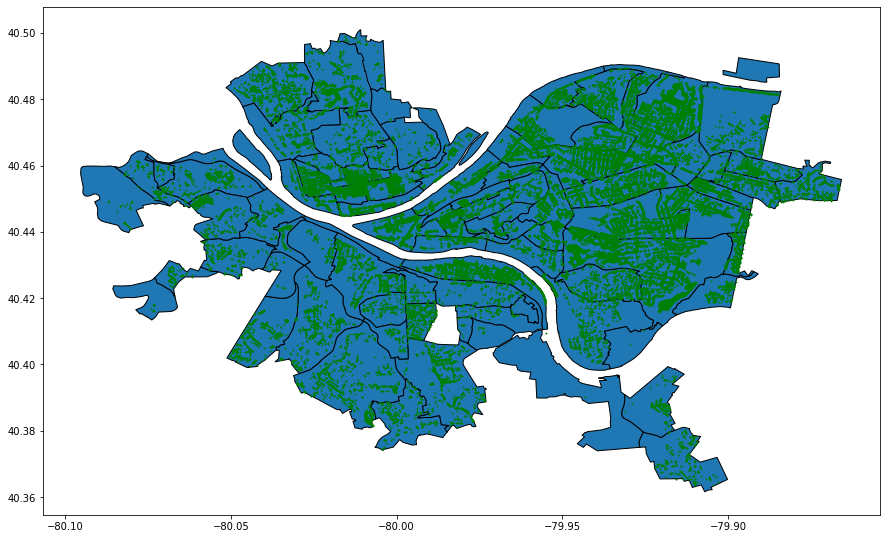

In [25]:
geometry = [Point(xy) for xy in zip(trees['longitude'],trees['latitude'])]
gdf = GeoDataFrame(trees, geometry = geometry)
g =gdf.plot(ax = neighborhoods.plot(figsize=(15,15), edgecolor = 'black'),marker = '*', color ='green', markersize = 1)
plt.show()

#### And the Winner is...

According to our tree data, **Squirrell Hill South** is the "prettiest" neighborhood in Pittsburgh without accounting for other metrics.

### Metric 2: Traffic Trap

First, lets read in our data set.

In [26]:
traffic = pd.read_csv("traffic.csv", low_memory = False)

Now, lets find the total number of traffic per neighborhood.

In [27]:
temp = traffic.groupby('neighborhood').sum()['average_daily_car_traffic']
temp = temp.sort_values(ascending = True)
temp

neighborhood
Middle Hill                0.0
Crawford-Roberts           0.0
South Oakland              0.0
Banksville                 0.0
Upper Lawrenceville        0.0
                        ...   
Bloomfield             43101.0
Mount Washington       47336.0
East Liberty           51247.0
Shadyside              66132.0
Squirrel Hill South    79302.0
Name: average_daily_car_traffic, Length: 74, dtype: float64

This is a good start, however some of the neighborhoods in the file are missing data, so lets remove all neighborhoods with no data from consideration. 

In [28]:
query = traffic['average_daily_car_traffic']>0
traffic = traffic[query]
temp = traffic.groupby('neighborhood').sum()['average_daily_car_traffic']
temp = temp.sort_values(ascending = True)
temp

neighborhood
South Side Flats              115.0
Lincoln Place                 126.0
Lincoln-Lemington-Belmar      195.0
Fineview                      419.0
Allegheny West                477.0
                             ...   
Bloomfield                  43101.0
Mount Washington            47336.0
East Liberty                51247.0
Shadyside                   66132.0
Squirrel Hill South         79302.0
Name: average_daily_car_traffic, Length: 64, dtype: float64

Now that we've removed the neighborhoods that there is no data for, we need to average the number of cars by the number of traffic counters are in that neighborhood.

In [29]:
#sort data alphabetically
traffic = traffic.sort_values('neighborhood')
temp = traffic.groupby('neighborhood').sum()['average_daily_car_traffic']
temp2 = traffic['neighborhood'].value_counts()
temp2 =temp2.sort_index()


In [30]:
#divide the number of cars by the number of counters
temp= (temp/temp2).round()
temp.sort_values()

neighborhood
South Side Flats              115.0
Lincoln Place                 126.0
Lincoln-Lemington-Belmar      195.0
Fineview                      419.0
Allegheny West                477.0
                             ...   
East Hills                   8126.0
Strip District               9692.0
North Shore                 10350.0
Crafton Heights             11500.0
Regent Square               16729.0
Length: 64, dtype: float64

This is much better. Now we have data that represents the average number of cars per counter in each neighborhood, excluding those neighborhoods with no data.

Next, we should separate the bottom five averages to isolate the least traffic neighborhoods.

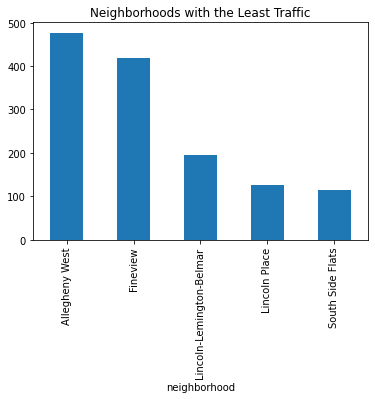

In [31]:
temp = temp.sort_values(ascending=False)
low = temp.tail(5)
low.plot.bar(x = temp[0], y = temp[1], title = "Neighborhoods with the Least Traffic")

Usually, we would show a graphical representation here, but we are looking for the **lowest** amount of traffic, and the lower averages have such a low standard deviation that they would not be easily differentiable when plotted on a map.

#### And the Winner is...
So, extrapolating our data, it is clearly apparent that **Highland Park** is the best neighborhood traffic wise, with the neighborhood only averaging 104 cars per counter.

### Metric 3: Art

Let's load in our data now.

In [32]:
art = pd.read_csv("art.csv")
art

,id,name,title,artist_name,art_type,park,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,812728309,1001,Oakwood Road Monument,NaN,NaN,NaN,NaN,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429192,-80.066225
1,188255168,1002,Rooster Waiting For The Streetcar,James Simon,Modern and Contemporary Art,NaN,NaN,Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.442926,-80.039711
2,2032091917,129,Middle East Memorial Plaque,NaN,War Memorials,NaN,NaN,Central Business District,6.0,1.0,4.200302e+10,6.0,1.0,2.0,1-4,40.438092,-79.996852
3,1447629273,143,L'Enfant,Paul Roger-Bloche,Historic Art,NaN,NaN,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-23,40.388748,-79.986497
4,1935017944,148,Veterans Memorial (Brookline),NaN,War Memorials,Brookline Monument,NaN,Brookline,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-26,40.391721,-80.016981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1089921133,WM00099000,17th Ward Veterans Memorial,NaN,Non-City Owned,NaN,NaN,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-24,40.428635,-79.980443
195,191395610,WM00101000,Saint Josephat Honor Roll,NaN,Non-City Owned,NaN,NaN,South Side Slopes,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-22,40.423129,-79.973486
196,628976107,WM00102000,World War II Momument,NaN,Non-City Owned,NaN,NaN,Spring Garden,1.0,26.0,4.200324e+10,1.0,26.0,1.0,1-11,40.471780,-79.986670
197,1309894649,WM00105000,Korean War Veterans Memorial,R. Allan Christianson (Architect),War Memorials,Northshore Riverfront Park,NaN,North Shore,1.0,22.0,4.200398e+10,6.0,22.0,1.0,1-7,40.445726,-80.008082


There is a lot of information in this file, so lets isolate it to neighborhoods and number of art pieces per neighborhood.

In [33]:
art.iloc[:,0] = 1
valuesart = art.groupby('neighborhood').sum()['id']
valuesart

neighborhood
Allegheny Center             18
Allegheny West                1
Allentown                     2
Beechview                     7
Beltzhoover                   3
Bloomfield                    1
Brighton Heights              5
Brookline                     2
Carrick                       2
Central Business District    27
Central Lawrenceville         2
Central Oakland               5
Crafton Heights               1
Crawford-Roberts              3
Duquesne Heights              3
East Allegheny                2
East Carnegie                 1
East Hills                    1
East Liberty                  1
Elliott                       3
Esplen                        1
Garfield                      2
Greenfield                    3
Hays                          1
Hazelwood                     3
Highland Park                10
Knoxville                     1
Lincoln-Lemington-Belmar      2
Lower Lawrenceville           5
Manchester                    1
Mount Washington           

This is a lot of data to sift through though, so lets take the best 5 and put them in a bar graph.

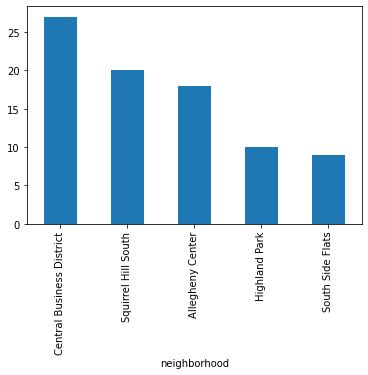

In [34]:
valuesart = valuesart.sort_values(ascending=False)
high = valuesart.head(5)
high.plot.bar(x = valuesart[0], y = valuesart[1])

Let's try interpreting this data in a way that's a little easier to read.

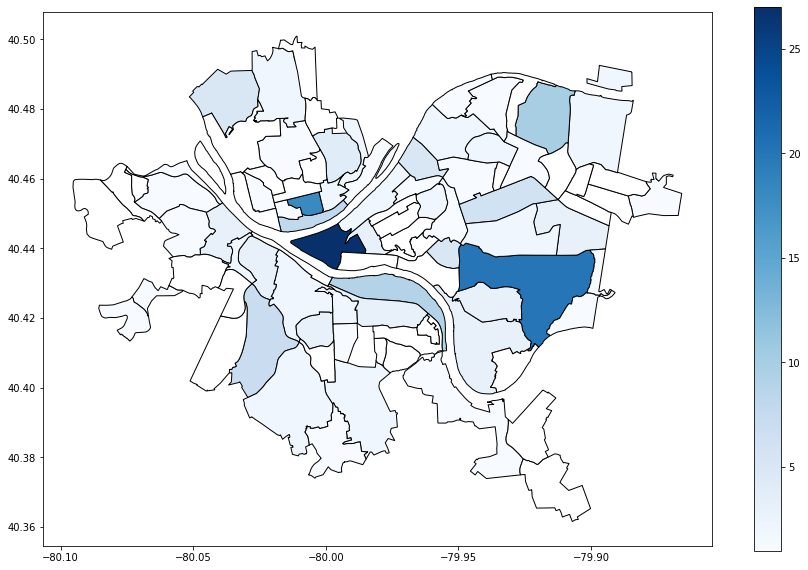

In [35]:
neighborhoodMap = neighborhoods.merge(valuesart, how = 'left',left_on = 'hood', right_on = 'neighborhood')
neighborhoodMap.plot(column = 'id',cmap = 'Blues', edgecolor ='black',figsize = (15,10), legend = True, missing_kwds={"color": "white"})

#### And the Winner is...

According to our street art data, **Downtown Pittsburgh** is the "prettiest" neighborhood in Pittsburgh without accounting for other metrics.

## Tallying the Metrics
We have decided that every metric gets equal weighting when considering the best neighborhood.

So, lets start calculating the best neighborhood.

In [43]:
## creating dictionary of each neighborhood and adding the value of the rank it got 
hooddict = dict()
i=1
for value in values.index:
    values[value] =i
    hooddict[value] = i
    i = i+1
i=1
for value in temp.index:
    if value in hooddict:
        hooddict[value] = hooddict[value]+i
    i = i+1
i=1
for value in valuesart.index:
    if value in hooddict:
        hooddict[value] = hooddict[value]+i
    i = i+1

Now we have a dictionary of each neighborhood and its ranking, however not every neighborhood had data for the traffic count. So lets average the ranks.

In [47]:
for value in temp.index:
    if value in hooddict:
        hooddict[value] = hooddict[value]/3
    else:
        hooddict[value] = hoodict[value]/2
hood = pd.Series(hooddict)
hood = hood.sort_values()
hood

Shadyside                2.888889
Squirrel Hill South      3.111111
Point Breeze North       4.111111
North Shore              4.777778
Point Breeze             4.777778
                          ...    
Allentown              104.000000
East Carnegie          119.000000
Oakwood                124.000000
Esplen                 136.000000
Hays                   143.000000
Length: 90, dtype: float64

## And The Winner Is...

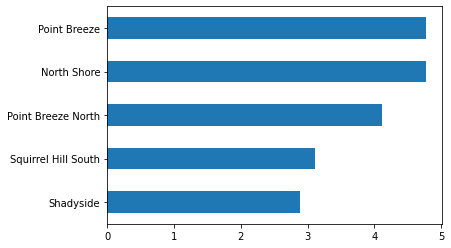

In [53]:
hood = hood.head(5)
hood.plot.barh(x = hood[0],y = hood[1])

## Shadyside

#### Remember, the lower the score the better

It makes sense that Shadyside is the most aesthetically pleasing neighborhood. It had a good mixture of art, greenery, and no cars. While it may not be the best for each metric, it provides the best overall mixture of the three.

## Conclusion:

Anna: While I personally would have picked Squirrell Hill South as the best neighborhood in Pittsburgh,it does make sense that Shadyside is the most aesthetically pleasing neighborhood. With its mix of art, architecture, and nature, it is a beautiful neighborhood with an even mix of natural and city beauty.  

Liam:The Pittsburgh art data would suggest that Downtown Pittsburgh is the best neighborhood, but this is likely because the area is very dense and in the heart of the city. My personal favorite neighborhood has to be Shadyside. It has 6 street art pieces, so it is not lacking in the art department. It also has a lot of artsy shops that could not be accounted for in the the data, like tattoo parlors and gift shops. It also has good foot traffic and stays lively despite being distanced from downtown. It doesn't surprise me that it is out overall "best" neighborhood.